In [77]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
from pandas import DataFrame

Populating the interactive namespace from numpy and matplotlib


Reading the file, assuming it's located in the same directory as the notebook. Download the file from this [link](https://drive.google.com/drive/u/1/folders/1XulDhXGFxxIUiFrWEmX7BZEvmO_FjRow).

In [2]:
financials = pd.read_csv('financials.csv')

/Users/amavel/Library/Python/2.7/lib/python/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,3,6,9,10,14,15,16,17,18,37,58,59,90,94,95,96,97,112,115,116,117,133,134,163,185,188,192,194,237,238,275,276,287,301,317,342,359,361,439,440,441,465,479,510,532,550,551,563,647) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
stock_prices = pd.read_csv('q.3146.adjusted_close.csv')

In [70]:
symbols = pd.read_csv('q.3146.symbols.csv')
stock_prices = stock_prices.join(symbols.set_index('id'), on='symbol_id')

In [71]:
stock_prices = stock_prices.set_index('date').sort_index()

Setting the name of the company. The company names in TowerStreet are normalized, such that the characters are lower case, special symbols are removed, spaces also removed, and additional legal types ignored (e.g. 'target', 'homedepot', 'att').

In [3]:
normalized_company_name = 'target'

## Financials

A documentation of the meaning of the columns is available [here](https://ceai-io.atlassian.net/wiki/spaces/TS/pages/221773871/Finance+schema+attributes#Financeschemaattributes-compm_fundq) under the `compm_fundq` name. Additionally, the normalized company name is available in the column `name`.

### Revenue

In [4]:
revenue = financials[financials['name'] == normalized_company_name][['datadate', 'revtq']]
revenue = revenue.set_index('datadate')

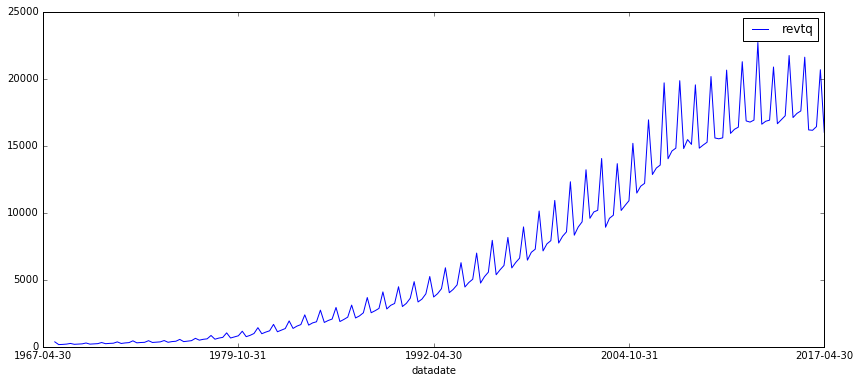

In [5]:
revenue.plot()

### Net income

In [6]:
net_income = financials[financials['name'] == normalized_company_name][['datadate', 'niq']]
net_income = net_income.set_index('datadate')

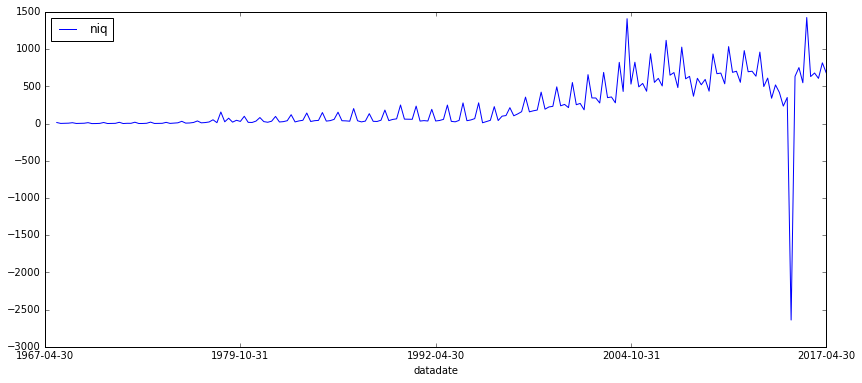

In [7]:
net_income.plot()

### Stock prices

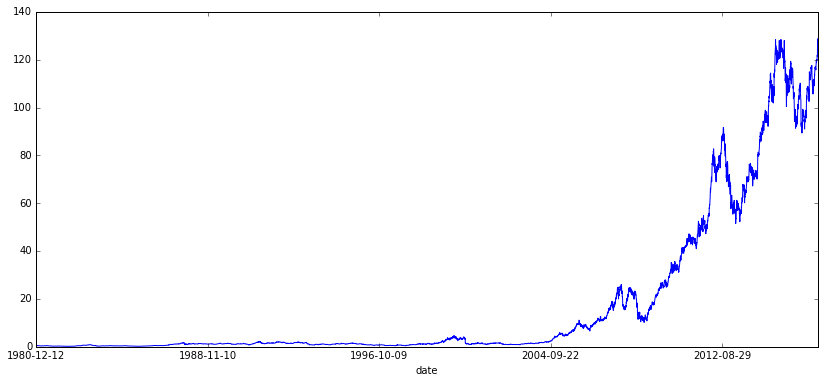

In [72]:
stocks = stock_prices[stock_prices['symbol'] == 'AAPL']['value']
# stocks[stocks > 15].sort_index()
stocks.plot()

In [73]:
from statsmodels.tsa.arima_model import ARIMA

In [74]:
model = ARIMA(stocks, order=(5,1,0))

In [75]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 9112
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8046.026
Method:                       css-mle   S.D. of innovations              0.585
Date:                Sun, 07 Jan 2018   AIC                          16106.052
Time:                        12:09:02   BIC                          16155.873
Sample:                    12-15-1980   HQIC                         16122.994
                         - 02-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0141      0.006      2.389      0.017       0.003       0.026
ar.L1.D.value     0.0187      0.011      1.768      0.077      -0.002       0.039
ar.L2.D.value    -0.0239      0.011     

In [79]:
residuals = DataFrame(model_fit.k_trend)
residuals.plot()

PandasError: DataFrame constructor not properly called!

In [82]:
model_fit.model